# Task6: Predicting Real Estate House Prices

### Juan Henao Barrios

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [2]:
realEstate = pd.read_csv('Real_estate.csv')
realEstate.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [3]:
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [4]:
realEstate.shape

(414, 8)

### What are the features available in the dataset?

In [5]:
realEstate.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [6]:
realEstate.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [7]:
X = realEstate.drop(columns={'Y house price of unit area'}, axis=1)
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [8]:
y = realEstate['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=18)

### Choose the model (Linear Regression)

In [40]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [41]:
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

### Train the model

In [42]:
model.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [43]:
y_pred = model.predict(X_test)
y_pred

array([39.90951364, 47.05309874, 36.73187547, 35.65354448, 44.02263547,
       34.03201839, 47.19016195, 32.00923088, 17.06456867, 43.58275191,
       26.4355731 , 37.13110363, 45.64161366, 36.94645819, 45.83506208,
       37.75961381, 34.70251175, 38.10256764, 42.01297225, 41.7446641 ,
       43.33331073, 30.87137187, 36.65960818, 43.77386769, 37.59321328,
       45.47695484, 48.03099846, 43.12214902, 37.49318951, 28.76152353,
       29.38196916, 33.05304473, 47.9640629 , 45.53996454, 46.73123211,
       23.47233944, 40.93277674, 13.57219523, 37.70245695, 43.34028488,
       30.42264875, 41.10639449, 51.3413419 , 45.24704924, 37.11007658,
       48.35378479, 47.52087137, 14.5311208 , 48.44202817, 46.53703134,
       44.67018291, 46.7357722 , 53.82063085, 50.14041378, 46.4863233 ,
       49.73298276, 43.80303146, 21.25513385, 32.48851488, 44.07581339,
       41.40494726, 44.10468793, 36.79433337, 29.92860186, 34.56093917,
       12.29722876, 41.77461085, 43.99290388, 32.33675016, 46.65

### Display the coefficients

In [44]:
model.coef_

array([ 1.58535943e-03,  5.76721078e+00, -2.67660480e-01, -4.55427878e-03,
        1.20368039e+00,  1.93019776e+02, -2.06143331e+01])

### Find how well the trained model did with testing data

In [46]:
print("r2 Score on test data: ",model.score(X_test, y_test))

r2 Score on test data:  0.6105600246506186


### Plot House Age Vs Price
#### Hint: Use regplot in sns

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

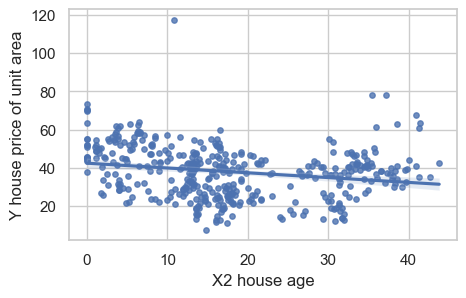

In [76]:
import matplotlib.pyplot as plt
#set seaborn theme
sns.set_theme(context='notebook', style='whitegrid')


# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x='X2 house age', y='Y house price of unit area', 
            data=realEstate, marker='o', scatter_kws={'s':15})

### Plot Distance to MRT station Vs Price

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

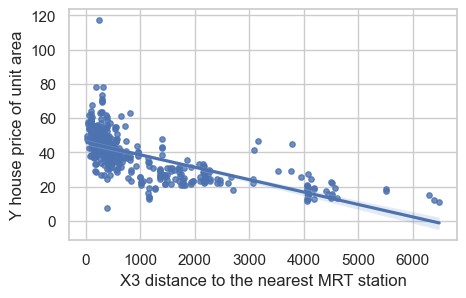

In [78]:
#set seaborn theme
sns.set_theme(context='notebook', style='whitegrid')

#Personally I would plot it this way...

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', 
            data=realEstate, marker='o', scatter_kws={'s':15})

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

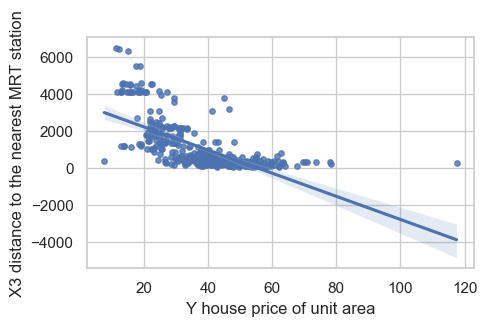

In [80]:
# But it's true that the price should go in the independent axis that way it would look like this
fig, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x='Y house price of unit area', y='X3 distance to the nearest MRT station', 
            data=realEstate, marker='o', scatter_kws={'s':15})


### Plot Number of Convienience Stores Vs Price

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

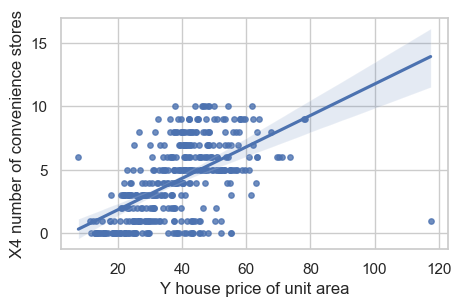

In [82]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x='Y house price of unit area', y='X4 number of convenience stores', 
            data=realEstate, marker='o', scatter_kws={'s':15})

## A couple of extra plots

### Latitud vs house price

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X5 latitude'>

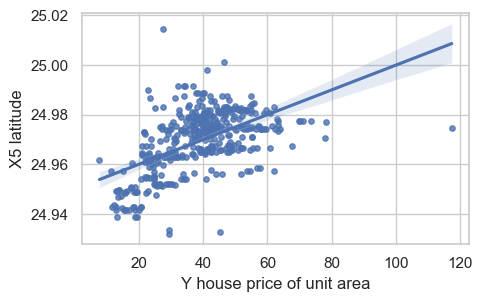

In [84]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x='Y house price of unit area', y='X5 latitude', 
            data=realEstate, marker='o', scatter_kws={'s':15})

### Longitude vs house price

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X6 longitude'>

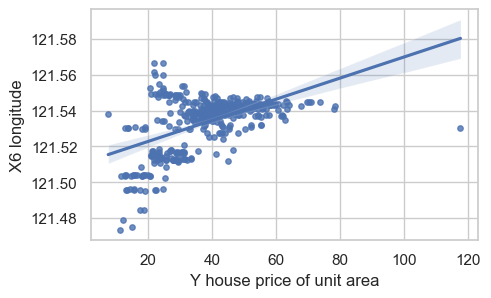

In [85]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x='Y house price of unit area', y='X6 longitude', 
            data=realEstate, marker='o', scatter_kws={'s':15})